<font color='yellow'> Need to install flask-ngrok, pyngrok to run Flask in google colab.
ngrok will tunnel localhost  127.0.0.0 -> external url </font>

In [ ]:
!pip install flask-ngrok
!pip install pyngrok

<font color='yellow'>You need to replace 'Your ngrok token' with your ngrok token. Token can be achieved from ngrok after registering</font>

In [2]:
!ngrok authtoken 'Your ngrok token'

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


<font color='yellow'>**Step 7 - Deployment **


---
model exported during earlier step will be loaded and entegagred with web framework (we will use Python Flask as a integration framework)
</font>


In [3]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
import pickle

app = Flask(__name__)
#below step is required only when application is hosted in google colab
run_with_ngrok(app)

with open('/content/drive/MyDrive/Python/AI/models/model.pkl', 'rb') as file:
    model = pickle.load(file)


@app.route('/')
def home():
    return '<p>Hello World</p>'


@app.route("/predict", methods=['POST'])
def predict():
    content_type = request.headers.get('Content-Type')
    if content_type == 'application/json':
        json = request.json
        age = json.get('age')
        distance = json.get('distance')
        nos = json.get('nos')
        price = model.predict([[age, distance, nos]])
        return f"{price}"
    else:
        return 'Content-Type not supported!'


if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://b72b-34-135-29-173.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [07/Sep/2023 06:29:32] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2023 06:29:33] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2023 06:29:33] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2023 06:29:50] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [07/Sep/2023 06:32:24] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [07/Sep/2023 06:38:43] "POST /predict HTTP/1.1" 200 -


<font color='yellow'>Testing API</font>


---



<font color='green'> curl -d '{ "age": 15, "distance": 500, "nos": 10 }' -H "Content-Type: application/json" -X POST https://b72b-34-135-29-173.ngrok-free.app/predict </font>


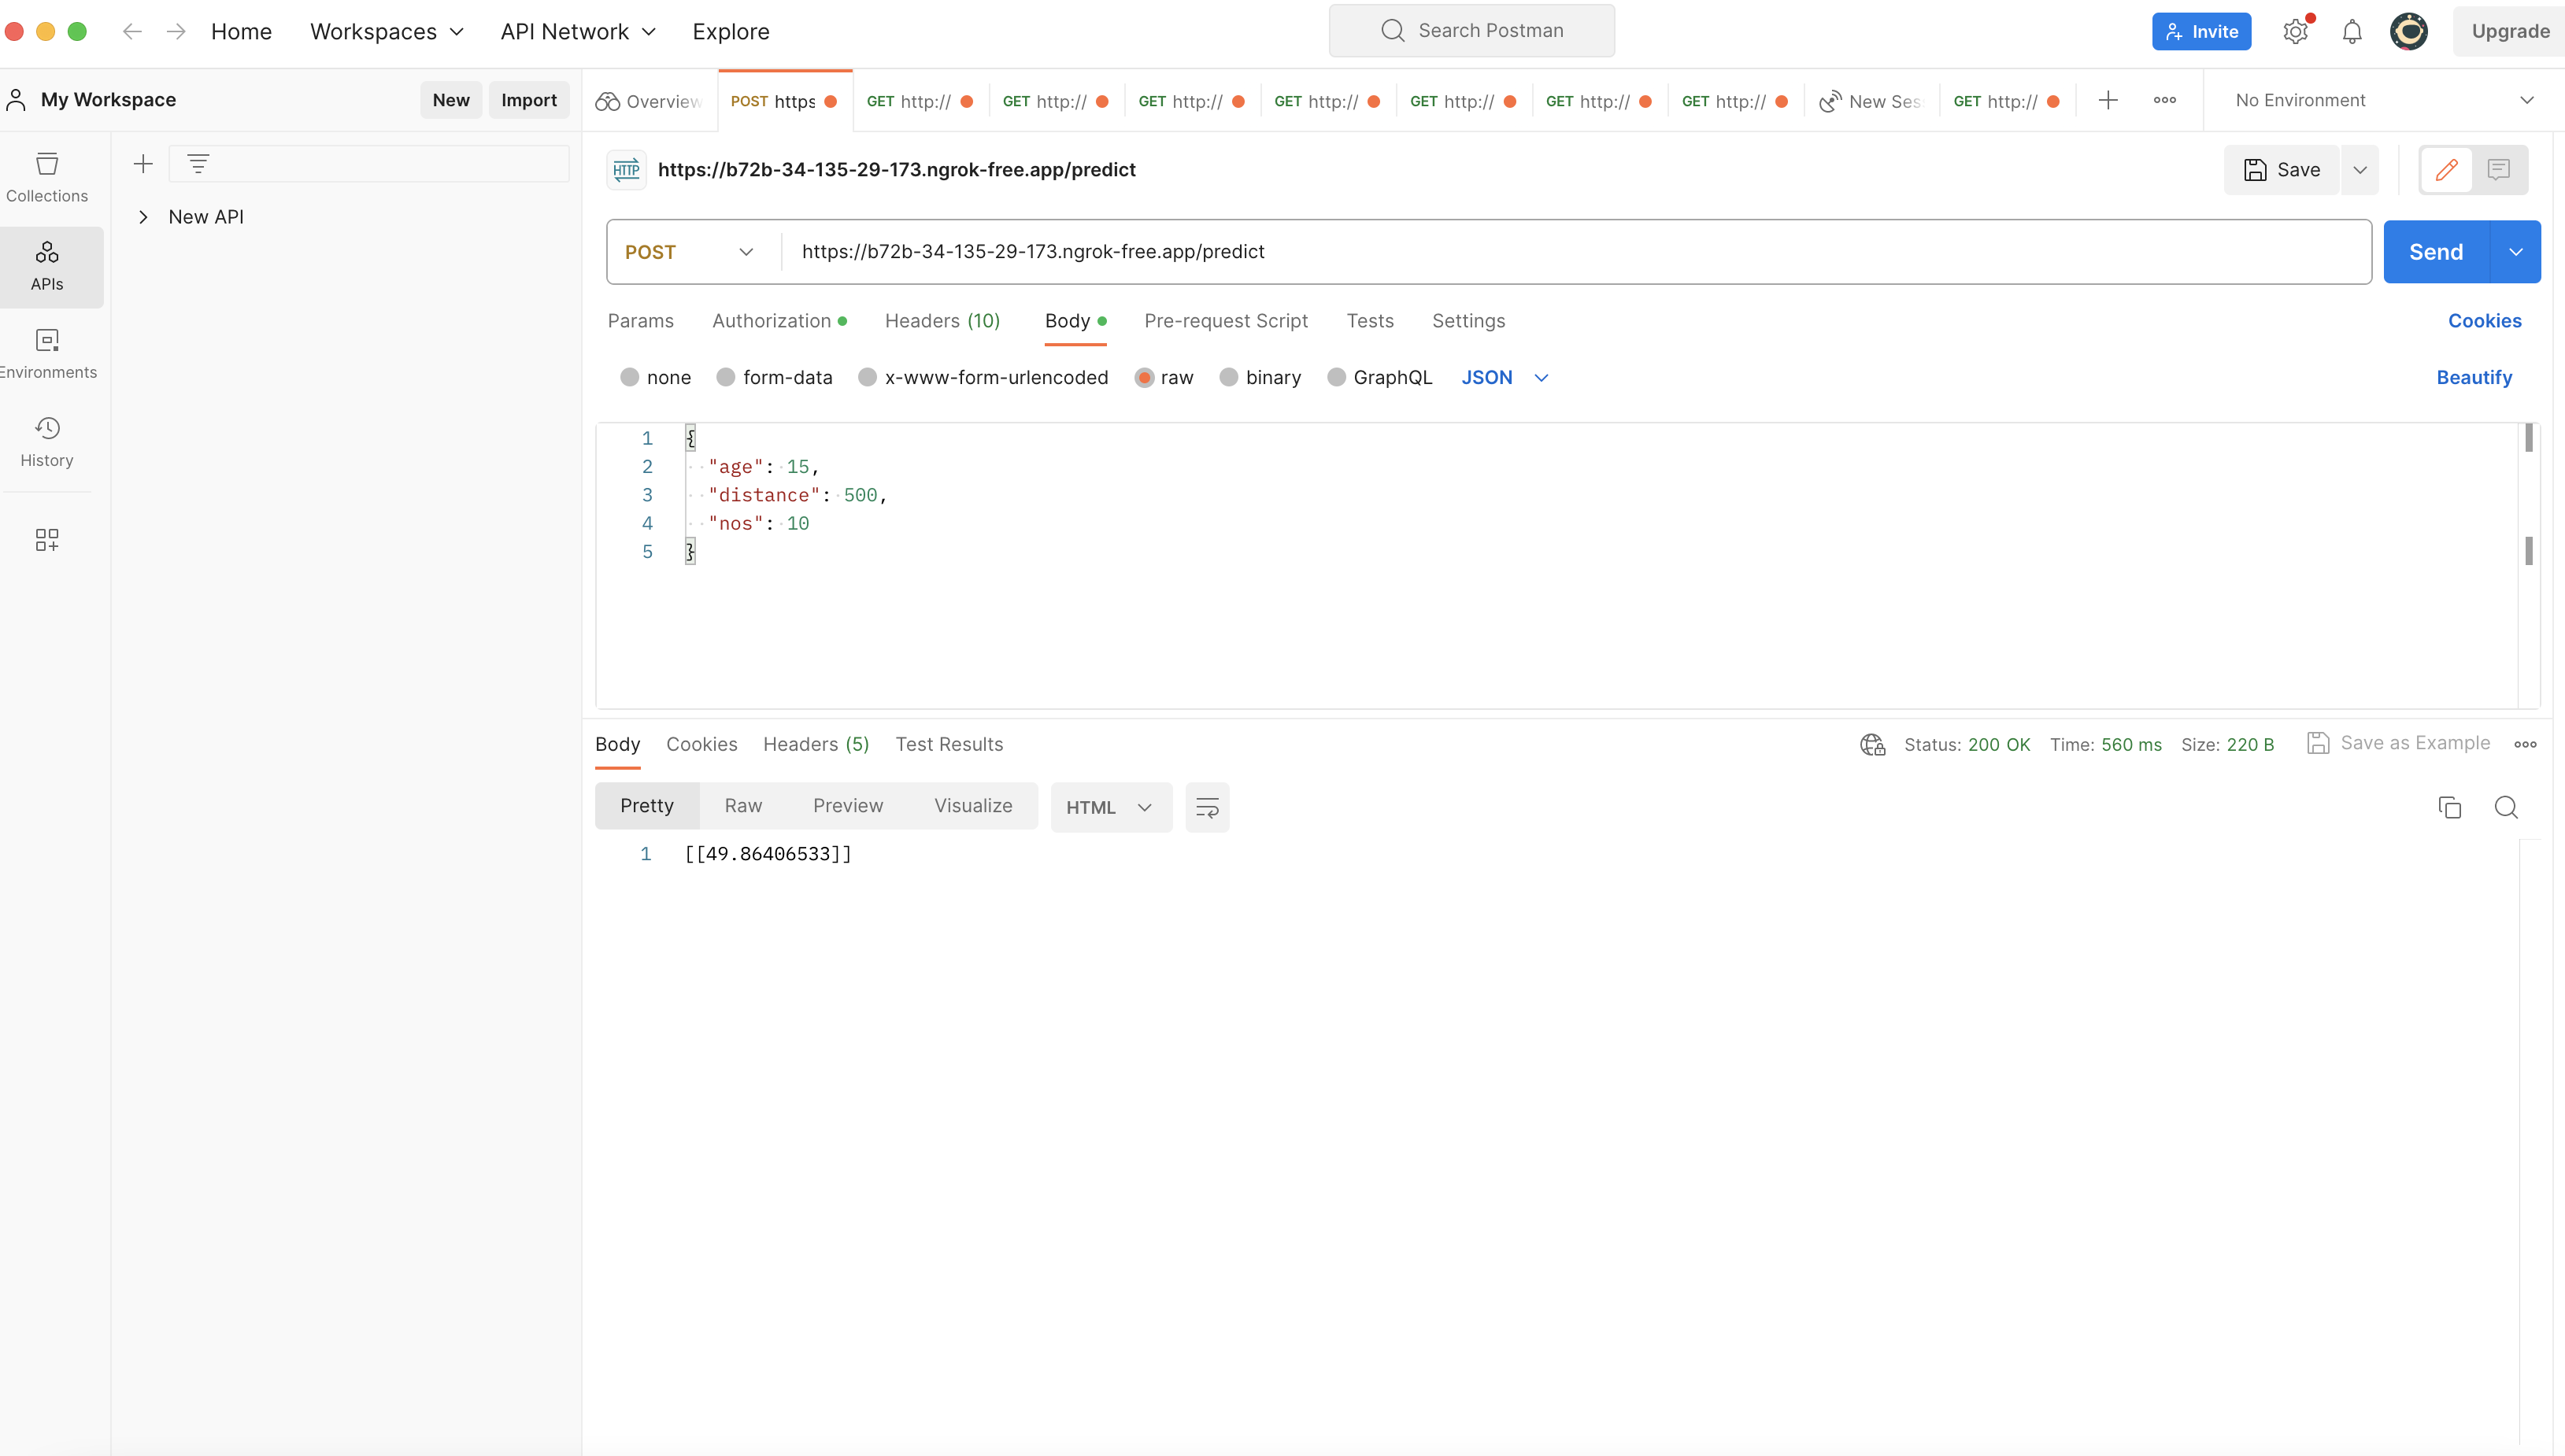